# 1. import library
mengimpor beberapa pustaka (library) Python yang dibutuhkan

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler, LabelEncoder
from matplotlib.colors import ListedColormap
from sklearn.feature_selection import RFE , f_regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import f1_score
import joblib


# 2. load dataset dan analisis dataset
membaca dataset dari folder yang sudah didownload

In [7]:
# https://www.kaggle.com/datasets/ehababoelnaga/diabetes-dataset/data
df_train = pd.read_csv('dataset/Training.csv')
df_test = pd.read_csv('dataset/Testing.csv')
df_combined = pd.concat([df_train, df_test], ignore_index=True)



In [9]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2768 non-null   int64  
 1   Glucose                   2768 non-null   int64  
 2   BloodPressure             2768 non-null   int64  
 3   SkinThickness             2768 non-null   int64  
 4   Insulin                   2768 non-null   int64  
 5   BMI                       2768 non-null   float64
 6   DiabetesPedigreeFunction  2768 non-null   float64
 7   Age                       2768 non-null   int64  
 8   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 194.8 KB


bentuk dataset tidak ada yang berbentuk object, sehingga tidak perlu ada perubahan data


Dataset Features:
    Pregnancies:	Jumlah kehamilan

    Glucose	Kadar: glukosa darah

    BloodPressure:	Tekanan darah diastolik

    SkinThickness:	Ketebalan lipatan kulit triceps

    Insulin:	Kadar insulin

    BMI:	Body Mass Index

    DiabetesPedigreeFunction:	Riwayat diabetes dalam keluarga

    Age:	Umur

    Outcome:	0 = tidak diabetes, 1 = diabetes


In [10]:
df_combined.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.00000,2768.000000,2768.000000,2768.000000
mean,3.822616,121.421965,68.980491,20.549494,79.853324,31.97659,0.486277,32.923049,0.380419
std,3.305432,31.721258,19.133100,15.779713,115.655771,7.76054,0.357403,11.362964,0.485578
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.17500,0.248000,24.000000,0.000000
50%,3.000000,117.000000,71.000000,23.000000,36.000000,32.10000,0.380000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,129.000000,36.50000,0.645250,40.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.10000,2.420000,81.000000,1.000000


| Kolom           | Min | Penjelasan                                                                                         |
| --------------- | --- | -------------------------------------------------------------------------------------------------- |
| `Glucose`       | 0.0 | ⚠️ Tidak mungkin kadar gula darah (glukosa) seseorang benar-benar 0.                               |
| `BloodPressure` | 0.0 | ⚠️ Tekanan darah 0 menunjukkan seseorang tidak hidup — ini tidak realistis.                        |
| `SkinThickness` | 0.0 | ⚠️ Pengukuran tebal kulit 0 bisa terjadi jika tidak diukur, tapi ini seharusnya **missing value**. |
| `Insulin`       | 0.0 | ⚠️ Sangat kecil kemungkinan insulin = 0 pada manusia sehat, bisa jadi data tidak tersedia.         |
| `BMI`           | 0.0 | ⚠️ Tidak mungkin seseorang memiliki BMI 0.                                                         |




In [11]:
# Ganti 0 dengan NaN di kolom yang tidak boleh bernilai 0
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df_combined[cols_to_replace] = df_combined[cols_to_replace].replace(0, np.nan)
print(df_combined.isnull().sum())

Pregnancies                    0
Glucose                       18
BloodPressure                128
SkinThickness                810
Insulin                     1333
BMI                           35
DiabetesPedigreeFunction       0
Age                            0
Outcome                        0
dtype: int64


| Glucose| BloodPressure| SkinThickness| Insulin| BMI|
|------------|------------|------------|------------|---------------------------------------------- |
| 18|128|810|1333|35|

missing values yang dikodekan sebagai 0, maka solusi dibuat adalah adalah ubah semua nilai 0 yang tidak valid menjadi NaN.

In [12]:
df_cleaned = df_combined.dropna()
print(df_cleaned.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [13]:
df = df_cleaned
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1424 entries, 3 to 2765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1424 non-null   int64  
 1   Glucose                   1424 non-null   float64
 2   BloodPressure             1424 non-null   float64
 3   SkinThickness             1424 non-null   float64
 4   Insulin                   1424 non-null   float64
 5   BMI                       1424 non-null   float64
 6   DiabetesPedigreeFunction  1424 non-null   float64
 7   Age                       1424 non-null   int64  
 8   Outcome                   1424 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 111.2 KB


data yang sebelumnya 0 sudah dihapus, data tersisa 1424 kolom (sebelumnya 2768)

Kolom numerik yang akan divisualisasikan: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


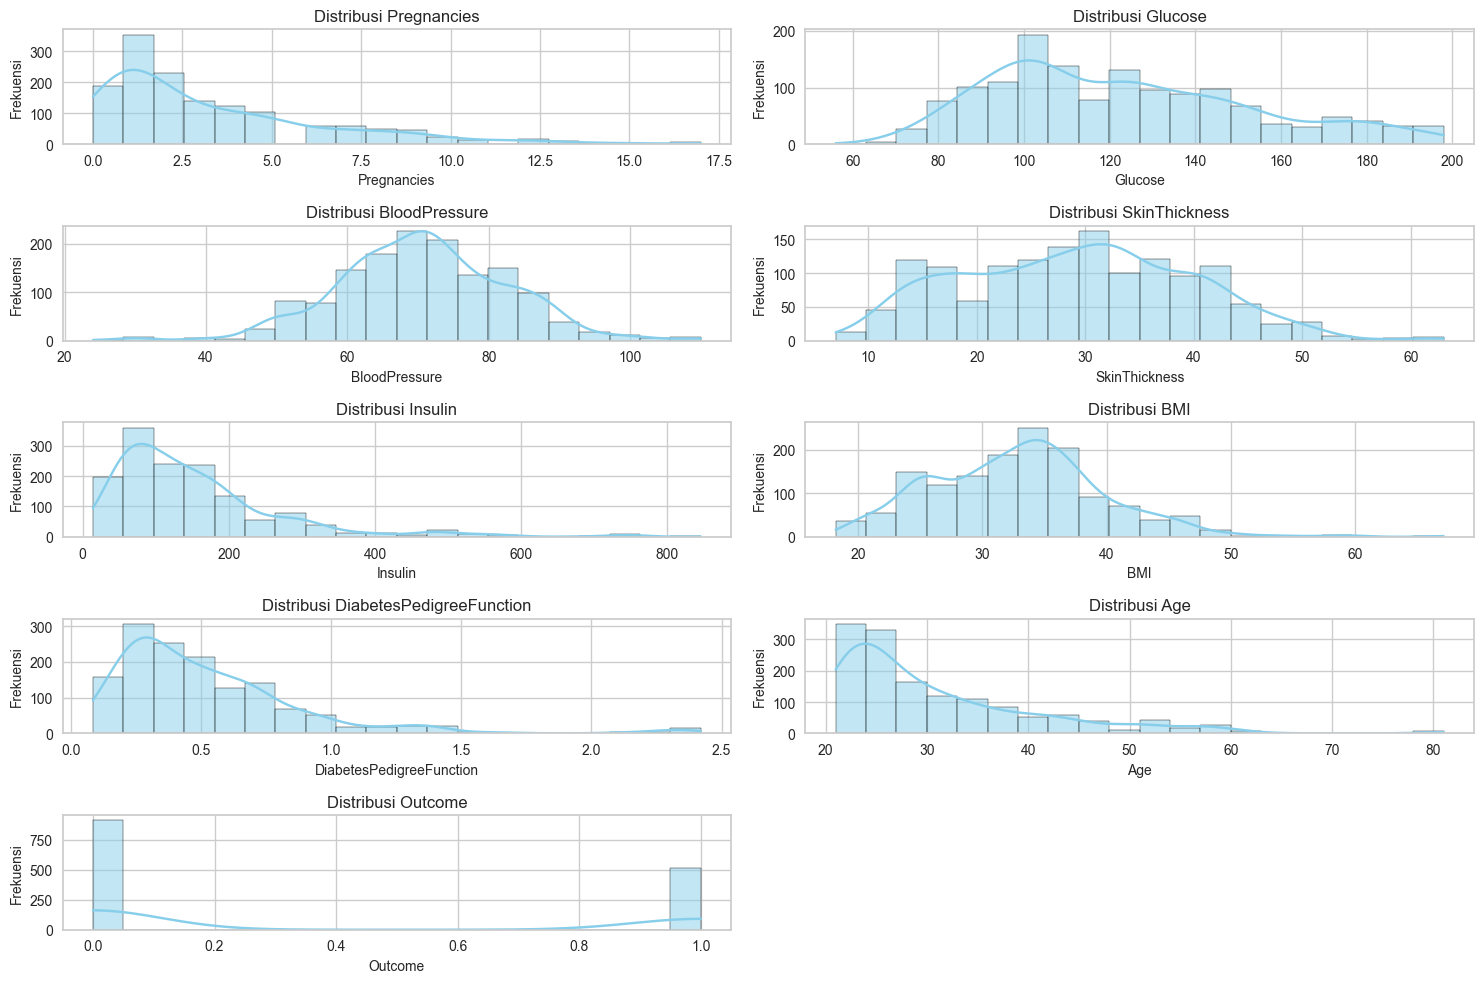

In [14]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(f"Kolom numerik yang akan divisualisasikan: {numeric_cols}")

plt.figure(figsize=(15, 10))
n_cols = len(numeric_cols)
n_rows = (n_cols + 1) // 2

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, 2, i)
    sns.histplot(df[col], bins=20, kde=True, color='skyblue')
    plt.title(f'Distribusi {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frekuensi', fontsize=10)

plt.tight_layout()
plt.show()

hasil dari visualisasi bahwa distribusi data tidak mewajibkan distribusi normal karena saya memakai linear regresi sebagai model klasifikasi

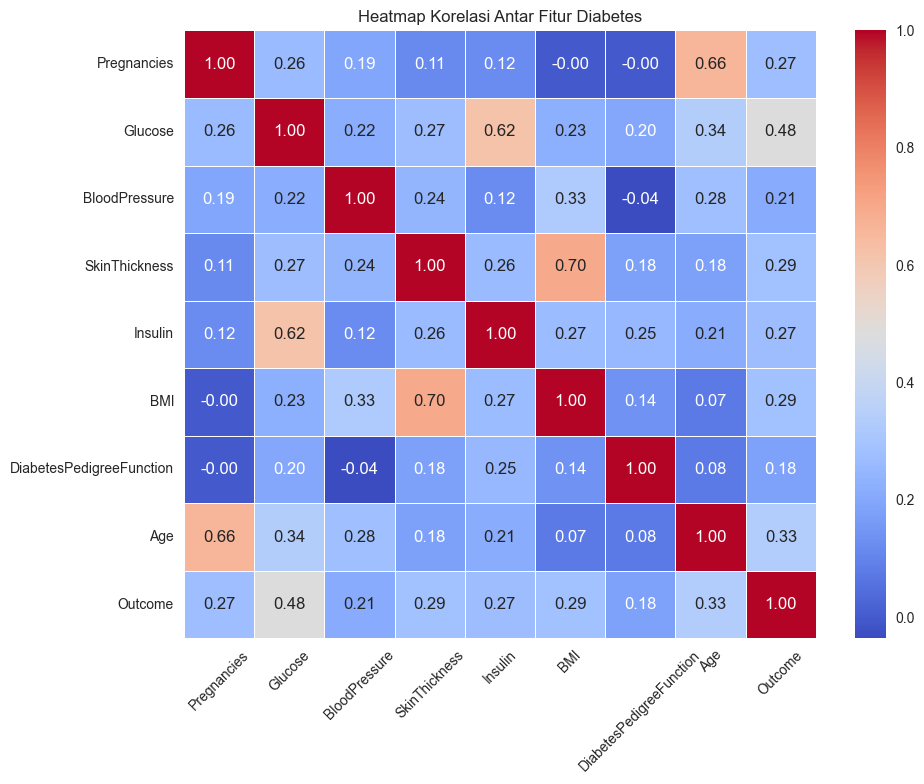

In [15]:
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Antar Fitur Diabetes')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Fitur yang paling berkorelasi dengan Outcome (label diabetes):

    - Glucose (0.48) → Korelasi positif sedang → makin tinggi kadar glukosa, makin besar kemungkinan diabetes.

    - Age (0.33) → Korelasi positif → makin tua usia, makin besar kemungkinan diabetes.

    - BMI (0.29) → Korelasi positif → makin tinggi BMI, makin besar kemungkinan diabetes.

    - SkinThickness & Insulin juga memiliki korelasi lemah (sekitar 0.27-0.29).

In [16]:
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    mask = ~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)
    return data[mask]

fungsi untuk mengapus outlier menggunakan rumus iqr

In [17]:
# Normalisasi data utk outlier
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
data_clean = remove_outliers_iqr(pd.concat([X, y], axis=1))

# Pisahkan kembali
X_clean = data_clean.drop("Outcome", axis=1)
y_clean = data_clean["Outcome"]
X_log = X_clean.copy()
cols_to_log = ["Insulin", "DiabetesPedigreeFunction", "Age", "Pregnancies"]

for col in cols_to_log:
    X_log[col] = np.log1p(X_log[col])

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_log)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_clean, test_size=0.2, random_state=42
)




data di normalisasi untuk outlier dan data di split 80% train dan 20% test

In [18]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

traning menggunakan model logistic regression

In [19]:
y_pred = model.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Akurasi: 0.7838983050847458
[[152   7]
 [ 44  33]]
              precision    recall  f1-score   support

           0       0.78      0.96      0.86       159
           1       0.82      0.43      0.56        77

    accuracy                           0.78       236
   macro avg       0.80      0.69      0.71       236
weighted avg       0.79      0.78      0.76       236



152: Benar prediksi tidak diabetes (True Negative)

33: Benar prediksi diabetes (True Positive)

7: Salah prediksi menjadi diabetes padahal tidak (False Positive)

44: Salah prediksi tidak diabetes padahal sebenarnya diabetes (False Negative)

Kelas 0 (Tidak Diabetes):

    Precision: 0.78 → 78% dari prediksi "tidak diabetes" benar.

    Recall: 0.96 → Hampir semua yang benar-benar tidak diabetes berhasil dikenali.

    F1-Score: 0.86 → Keseimbangan precision & recall cukup baik.

Kelas 1 (Diabetes):

    Precision: 0.82 → 82% dari prediksi "diabetes" benar.

    Recall: 0.43 → Hanya 43% kasus diabetes yang berhasil terdeteksi (rendah).

    F1-Score: 0.56 → Kinerja untuk deteksi diabetes masih kurang optimal.

In [ ]:

joblib.dump(scaler, 'robust_scaler.pkl')
joblib.dump(model, 'logreg_model.pkl')


['logreg_model.pkl']

In [4]:
scaler = joblib.load("saved_model/robust_scaler.pkl")
model = joblib.load("saved_model/logreg_model.pkl")
user_input = pd.DataFrame([
    {'Pregnancies': 3, 'Glucose': 78, 'BloodPressure': 50, 'SkinThickness': 32, 'Insulin': 88, 'BMI': 31.0, 'DiabetesPedigreeFunction': 0.848, 'Age': 26},
    {'Pregnancies': 1, 'Glucose': 165, 'BloodPressure': 69, 'SkinThickness': 8,  'Insulin': 68, 'BMI': 23.9, 'DiabetesPedigreeFunction': 0.66,  'Age': 22},
    {'Pregnancies': 5, 'Glucose': 115, 'BloodPressure': 72, 'SkinThickness': 35, 'Insulin': 130, 'BMI': 36.2, 'DiabetesPedigreeFunction': 0.35, 'Age': 40},
    {'Pregnancies': 0, 'Glucose': 92, 'BloodPressure': 60, 'SkinThickness': 28, 'Insulin': 0,  'BMI': 28.5, 'DiabetesPedigreeFunction': 2.2,   'Age': 19},
    {'Pregnancies': 4, 'Glucose': 180, 'BloodPressure': 85, 'SkinThickness': 29, 'Insulin': 150, 'BMI': 34.3, 'DiabetesPedigreeFunction': 0.2, 'Age': 33},
])

# Transformasi log untuk beberapa kolom
cols_to_log = ["Insulin", "DiabetesPedigreeFunction", "Age", "Pregnancies"]
for col in cols_to_log:
    user_input[col] = np.log1p(user_input[col])
user_input_scaled = scaler.transform(user_input)
probs = model.predict_proba(user_input_scaled)

for i, p in enumerate(probs):
    print(f"Data ke-{i+1} -> Probabilitas Tidak Diabetes (0): {p[0]*100:.2f}%, Diabetes (1): {p[1]*100:.2f}%")


Data ke-1 -> Probabilitas Tidak Diabetes (0): 90.72%, Diabetes (1): 9.28%
Data ke-2 -> Probabilitas Tidak Diabetes (0): 75.47%, Diabetes (1): 24.53%
Data ke-3 -> Probabilitas Tidak Diabetes (0): 56.93%, Diabetes (1): 43.07%
Data ke-4 -> Probabilitas Tidak Diabetes (0): 95.97%, Diabetes (1): 4.03%
Data ke-5 -> Probabilitas Tidak Diabetes (0): 27.45%, Diabetes (1): 72.55%


mencoba memasukan input baru, dan hasilnya sangat menjanjikan